In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

import pydicom as pdm

%matplotlib inline

# read data

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg


In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['imageid', 'maskid'], dtype='object')

## pretrained model

In [5]:
model_df = pd.read_csv("data/pretrained_model/pretrained_model/train_log_100_epoch.csv")

In [6]:
model_df.tail()

,train_loss,val_loss,train_dice,val_dice,train_jaccard,val_jaccard
95,0.011447,0.018125,0.972851,0.967665,0.956558,0.948802
96,0.011506,0.017431,0.973036,0.967924,0.956807,0.949173
97,0.011434,0.017504,0.973817,0.968438,0.957739,0.949604
98,0.011339,0.016963,0.973183,0.968132,0.957191,0.949369
99,0.011234,0.017644,0.974526,0.968592,0.958677,0.949940


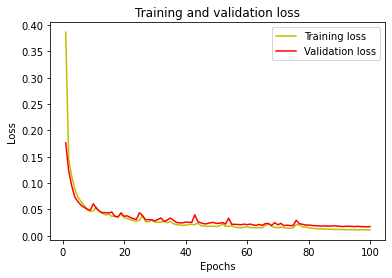

In [7]:
loss = model_df["train_loss"].values
val_loss = model_df["val_loss"].values
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

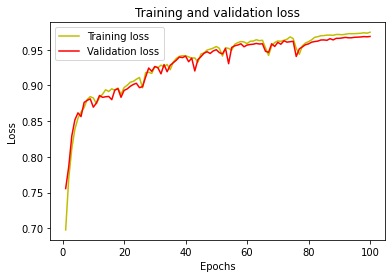

In [8]:
loss = model_df["train_dice"].values
val_loss = model_df["val_dice"].values
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

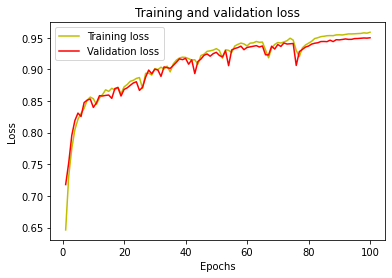

In [9]:
loss = model_df["train_jaccard"].values
val_loss = model_df["val_jaccard"].values
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
img  = plt.imread('data/images/images/ID00007637202177411956430_16.jpg')
mask = plt.imread('data/masks/masks/ID00007637202177411956430_mask_16.jpg')

print("Image Shape : " , img.shape)
print("Mask Shape : " , mask.shape)

Image Shape :  (512, 512)
Mask Shape :  (512, 512, 3)


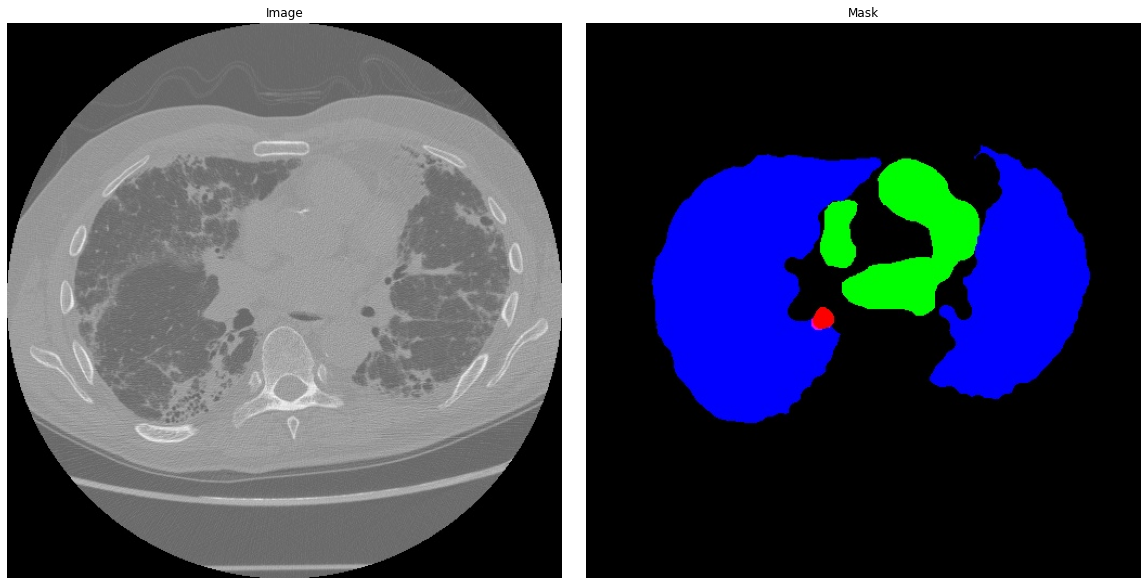

In [11]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

# Plot the first image on the left subplot
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
axs[0].axis('off')
axs[0].set_title('Image')
# Plot the second image on the right subplot
axs[1].imshow(mask)
axs[1].axis('off')
axs[1].set_title('Mask')

# Show the figure
plt.show()